<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv("/content/college_student_placement_dataset.csv")
print(df)

     College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0       CLG0030  107             6.61  6.28                     8   
1       CLG0061   97             5.52  5.37                     8   
2       CLG0036  109             5.36  5.83                     9   
3       CLG0055  122             5.47  5.75                     6   
4       CLG0004   96             7.91  7.69                     7   
...         ...  ...              ...   ...                   ...   
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                       No                       8                     8   
1                  

In [ ]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [3]:
print(df.ndim)
print(df.shape)
print(df.dtypes)

2
(10000, 10)
College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object


In [11]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(labels=['Placement'],axis=1),df['Placement'],test_size=0.3,random_state=0)

In [ ]:
print(df['College_ID'])

0       CLG0030
1       CLG0061
2       CLG0036
3       CLG0055
4       CLG0004
         ...   
9995    CLG0021
9996    CLG0098
9997    CLG0066
9998    CLG0045
9999    CLG0060
Name: College_ID, Length: 10000, dtype: object


In [ ]:
print(x_train.columns.tolist())


['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'College_ID_CLG0001', 'College_ID_CLG0002', 'College_ID_CLG0003', 'College_ID_CLG0004', 'College_ID_CLG0005', 'College_ID_CLG0006', 'College_ID_CLG0007', 'College_ID_CLG0008', 'College_ID_CLG0009', 'College_ID_CLG0010', 'College_ID_CLG0011', 'College_ID_CLG0012', 'College_ID_CLG0013', 'College_ID_CLG0014', 'College_ID_CLG0015', 'College_ID_CLG0016', 'College_ID_CLG0017', 'College_ID_CLG0018', 'College_ID_CLG0019', 'College_ID_CLG0020', 'College_ID_CLG0021', 'College_ID_CLG0022', 'College_ID_CLG0023', 'College_ID_CLG0024', 'College_ID_CLG0025', 'College_ID_CLG0026', 'College_ID_CLG0027', 'College_ID_CLG0028', 'College_ID_CLG0029', 'College_ID_CLG0030', 'College_ID_CLG0031', 'College_ID_CLG0032', 'College_ID_CLG0033', 'College_ID_CLG0034', 'College_ID_CLG0035', 'College_ID_CLG0036', 'College_ID_CLG0037', 'College_ID_CLG0038', 'College_ID_CLG0039', 'College_ID_

In [ ]:
df['College_ID'].nunique()


100

In [23]:
print(df)

     College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0       CLG0030  107             6.61  6.28                     8   
1       CLG0061   97             5.52  5.37                     8   
2       CLG0036  109             5.36  5.83                     9   
3       CLG0055  122             5.47  5.75                     6   
4       CLG0004   96             7.91  7.69                     7   
...         ...  ...              ...   ...                   ...   
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                       No                       8                     8   
1                  

In [65]:

x_train_encoded = pd.get_dummies(x_train, drop_first=True)

x_test_encoded = pd.get_dummies(x_test, drop_first=True)


x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)


In [68]:
constant_feature=[features for features in x_train_encoded.columns if x_train_encoded[features].std()==0]
len(constant_feature)

0

In [69]:
quasi_constant_features = []

for feature in x_train.columns:
    predominant = (x_train[feature].value_counts(normalize=True).values[0])
    if predominant >= 0.99:
        quasi_constant_features.append(feature)

print(f"Number of quasi-constant features: {len(quasi_constant_features)}")
for f in quasi_constant_features:
    print(f)


Number of quasi-constant features: 0


In [70]:
duplicated_feat = []

for i in range(0, len(x_train_encoded.columns)):
    col_1 = x_train_encoded.columns[i]
    for col_2 in x_train_encoded.columns[i + 1:]:
        if x_train_encoded[col_1].equals(x_train_encoded[col_2]):
            duplicated_feat.append(col_2)

print(f"Number of duplicated features: {len(duplicated_feat)}")


Number of duplicated features: 0


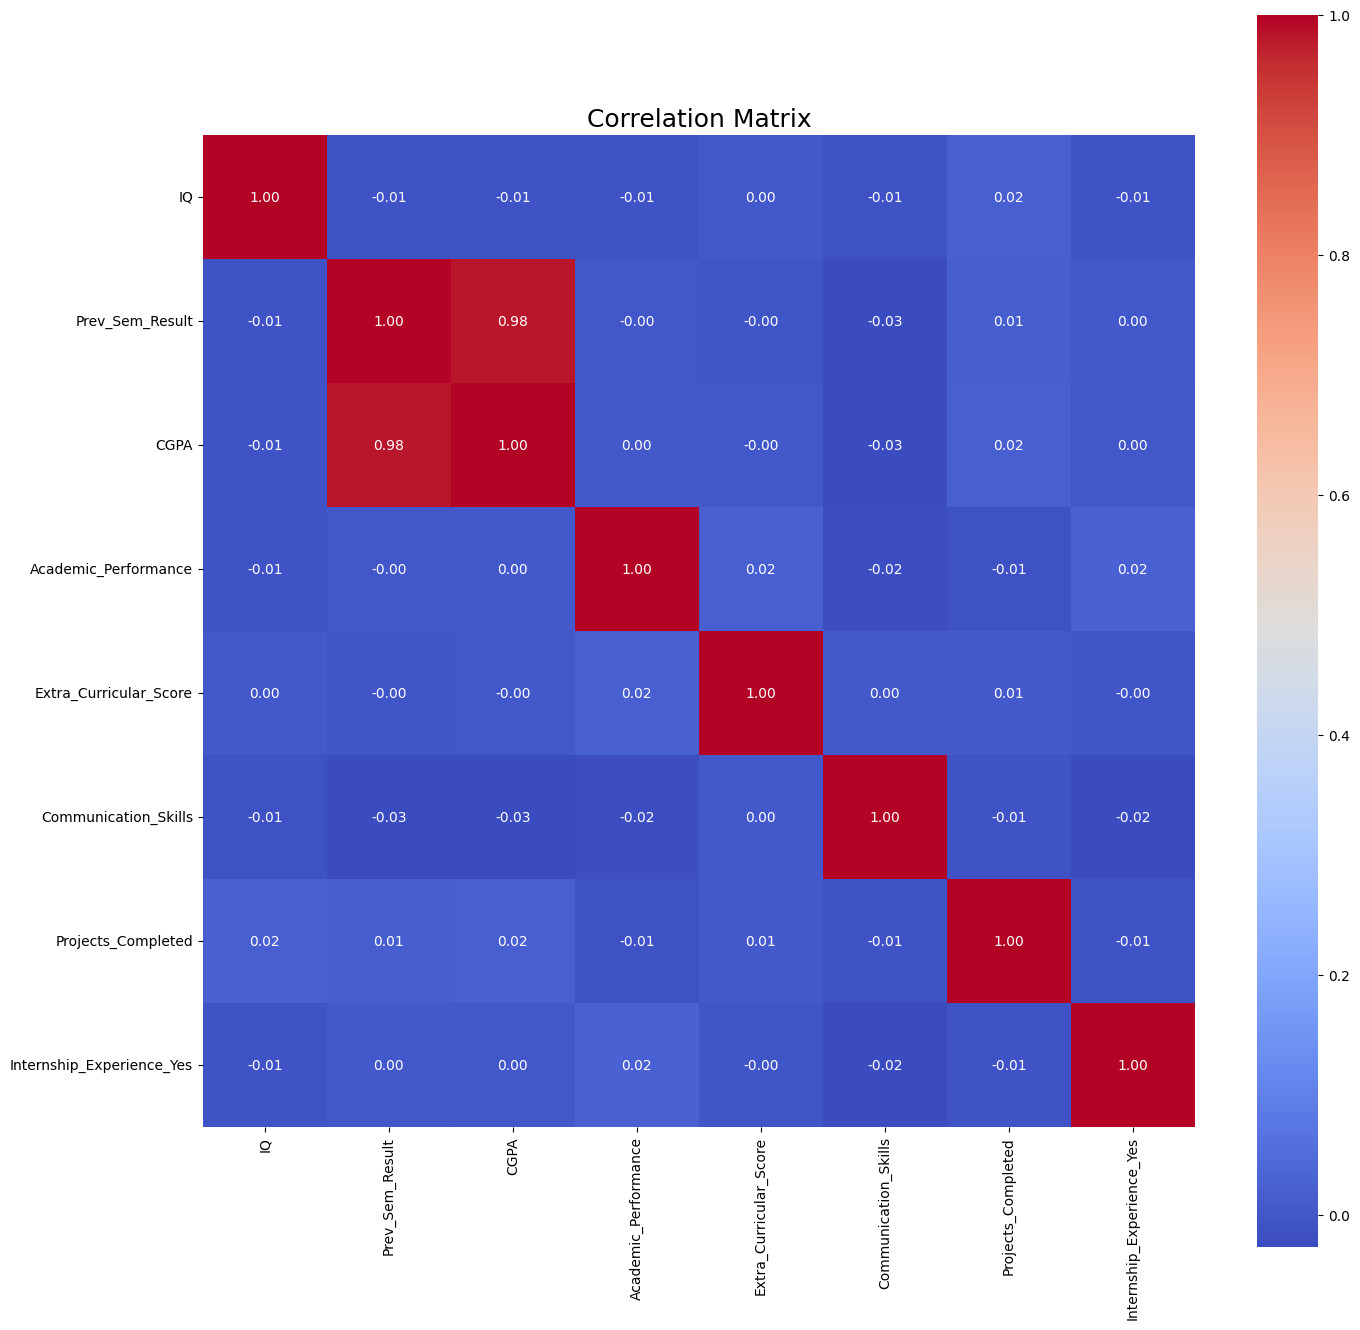

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = x_train_encoded.corr()

fig, ax = plt.subplots()
fig.set_size_inches(16, 16)

sns.heatmap(corrmat, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar=True)

plt.title("Correlation Matrix", fontsize=18)
plt.show()


In [72]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr


In [73]:
corr_features = correlation(x_train_encoded, 0.9)
correlated_features = set(corr_features)

print(len(correlated_features))

1


In [74]:

cols_to_drop = [col for col in correlated_features if col in x_train_encoded.columns]

x_train_encoded.drop(labels=cols_to_drop, axis=1, inplace=True)
x_test_encoded.drop(labels=cols_to_drop, axis=1, inplace=True)


In [75]:
print("X_train shape:", x_train_encoded.shape)
print("X_test shape:", x_test_encoded.shape)


X_train shape: (7000, 7)
X_test shape: (3000, 7)


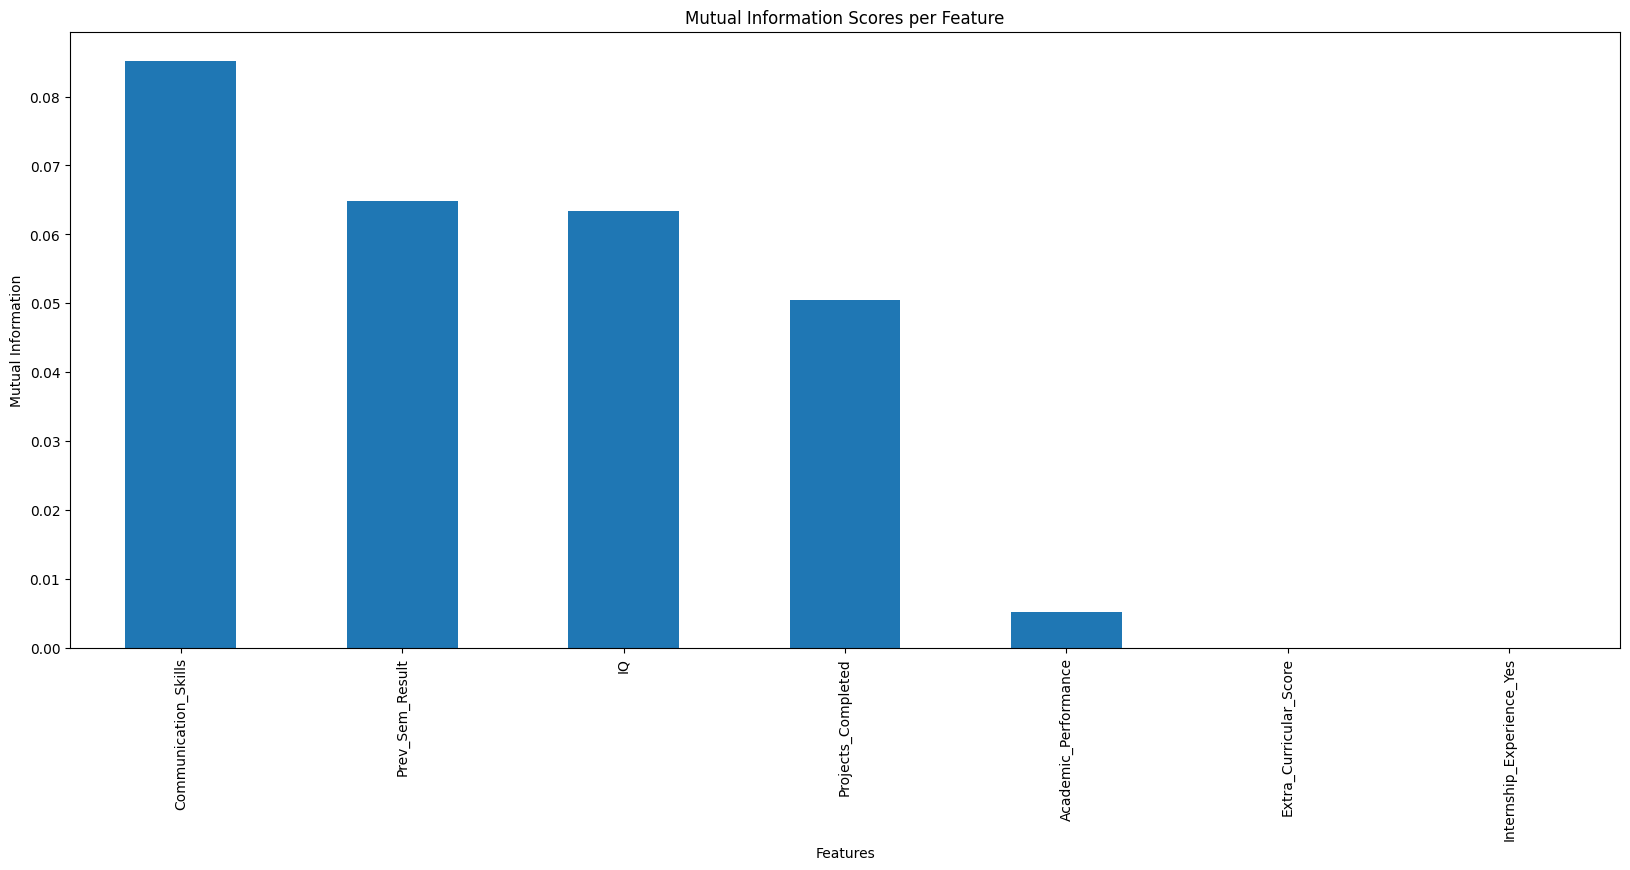

In [78]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

X_filled = x_train_encoded.fillna(0)
mi = mutual_info_classif(X_filled, y_train)
mi_series = pd.Series(mi, index=x_train_encoded.columns)
mi_sorted = mi_series.sort_values(ascending=False)

plt.figure(figsize=(20, 8))
mi_sorted.plot.bar()
plt.title('Mutual Information Scores per Feature')
plt.ylabel('Mutual Information')
plt.xlabel('Features')
plt.show()


In [80]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train_encoded.fillna(0), y_train)

selected_features = x_train_encoded.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


Top 10 Selected Features:
 ['IQ', 'Prev_Sem_Result', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Internship_Experience_Yes']
